In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [2]:
pima=pd.read_csv("pima-indians-diabetes.csv", header=None)
pima

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
pima.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype='int64')

# Rename columns

In [4]:
import pandas as pd
pima.rename(columns={0: 'Pregnancies', 1: 'Glucose', 2: 'Blood Pressure', 3: 'Skin Thickness', 4: 'Insulin', 5: 'BMI', 6: 'DiabetesPedigreeFunction', 7: 'Age', 8: 'Outcome'}, inplace=True)


In [5]:
pima.shape

(768, 9)

In [6]:
pima.describe()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
pima.head(5)

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   Blood Pressure            768 non-null    int64  
 3   Skin Thickness            768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Cheking missing values

In [9]:
from numpy import nan
pima[['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age' ]]=pima[['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].replace(0,nan)
pima.isnull().sum()


Pregnancies                 111
Glucose                       5
Blood Pressure               35
Skin Thickness              227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

# Replace missing values with median

In [10]:
pima[['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI']] = pima[['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI']].replace(0, nan)
pima.fillna(pima.median(),inplace=True)

# Outlier Detection

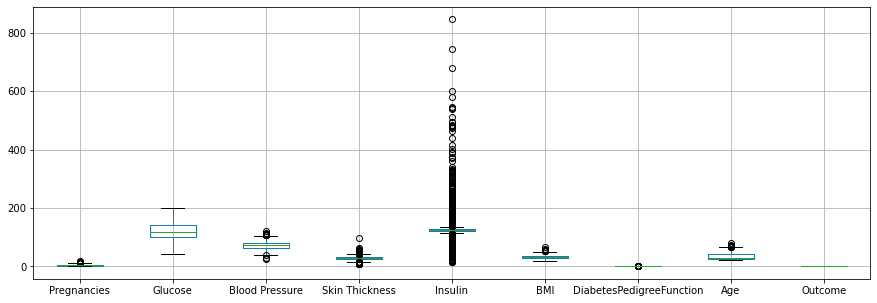

In [11]:
#detecting outlier
# Plot boxplot
plt.figure(figsize =[15,5])
pima.boxplot()
plt.show()

In [12]:
a = pima.iloc[: , 0:8]
b = pima.iloc[: , 8]

# Outlier detection and replacement by median using z-score

In [13]:
from scipy.stats import zscore

numeric_cols=a.select_dtypes(include=[np.number]).columns
z=a[numeric_cols].apply(zscore).abs()
print(z)

     Pregnancies   Glucose  Blood Pressure  Skin Thickness   Insulin  \
0       0.529395  0.866045        0.031990        0.670643  0.181541   
1       1.149280  1.205066        0.528319        0.012301  0.181541   
2       1.200864  2.016662        0.693761        0.012301  0.181541   
3       1.149280  1.073567        0.528319        0.695245  0.540642   
4       0.142075  0.504422        2.679076        0.670643  0.316566   
..           ...       ...             ...             ...       ...   
763     1.872334  0.679069        0.298896        2.150354  0.455573   
764     0.813545  0.011301        0.197433        0.239949  0.181541   
765     0.193660  0.021574        0.031990        0.695245  0.332132   
766     1.149280  0.142800        1.024647        0.012301  0.181541   
767     1.149280  0.942068        0.197433        0.215347  0.181541   

          BMI  DiabetesPedigreeFunction       Age  
0    0.166619                  0.468492  1.425995  
1    0.852200                  

In [14]:
my_cols=['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in my_cols:
    z.loc[z[col]>3,col]=np.nan

In [15]:
z.isnull().sum()

Pregnancies                  4
Glucose                      0
Blood Pressure               8
Skin Thickness               4
Insulin                     20
BMI                          5
DiabetesPedigreeFunction    11
Age                          5
dtype: int64

In [16]:
d=z.fillna(z.median())

In [17]:
d.isnull().sum()

Pregnancies                 0
Glucose                     0
Blood Pressure              0
Skin Thickness              0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [18]:
new=pd.concat([d,b],axis=1)
new.head()

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.529395,0.866045,0.031990,0.670643,0.181541,0.166619,0.468492,1.425995,1
1,1.149280,1.205066,0.528319,0.012301,0.181541,0.852200,0.365061,0.190672,0
2,1.200864,2.016662,0.693761,0.012301,0.181541,1.332500,0.604397,0.105584,1
3,1.149280,1.073567,0.528319,0.695245,0.540642,0.633881,0.920763,1.041549,0
4,0.142075,0.504422,2.679076,0.670643,0.316566,1.549303,0.642912,0.020496,1


In [19]:
X= new.iloc[:,new.columns !="Outcome"]
y= new.iloc[:,new.columns == "Outcome"]

In [20]:
y=new["Outcome"]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Balancing outcome with SMOTE

In [21]:
#Lets check if the data is Balanced or not
round(pima.Outcome.value_counts(normalize = True),2)

0    0.65
1    0.35
Name: Outcome, dtype: float64

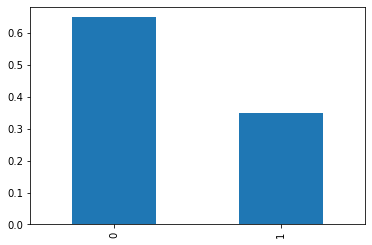

In [22]:
# Bar plot with respec to Outcoome 1 and 0 
round(pima.Outcome.value_counts(normalize = True),2).plot.bar()
plt.show()

In [23]:
from imblearn.over_sampling  import SMOTE
smt= SMOTE()
data_X, data_y =smt.fit_resample(X, y)

<AxesSubplot:>

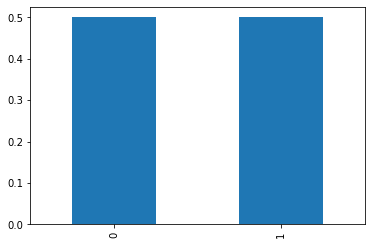

In [24]:
data_y.value_counts(normalize = True).plot.bar()

# Data scaling

In [25]:
from sklearn.preprocessing import StandardScaler
trans= StandardScaler()
trans.fit(X)
X=trans.fit_transform(X)

In [26]:
### SPLIT DATASET

In [27]:
import numpy
seed = 7
numpy.random.seed(seed)

In [28]:
X=pima.drop('Outcome',axis=1)
y=pima['Outcome']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(data_X,data_y,test_size=0.30,random_state=7)

### Data scaling

In [30]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#data_X[['Glucose','Blood Pressure','BMI','DiabetesPedigreeFunction','Age','Pregnancies','Skin Thickness','Insulin']] = scaler.fit_transform(data_X[['Glucose','Blood Pressure','BMI','DiabetesPedigreeFunction','Age','Pregnancies','Skin Thickness','Insulin']])
#X_test[['Glucose','Blood Pressure','BMI','DiabetesPedigreeFunction','Age','Pregnancies','Skin Thickness','Insulin']] = scaler.fit_transform(X_test[['Glucose','Blood Pressure','BMI','DiabetesPedigreeFunction','Age','Pregnancies','Skin Thickness','Insulin']])


In [31]:
#X_test

# Building Level 0 model

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc =  DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
from sklearn.svm import SVC
svc= SVC()


# Training Decision Treee

In [33]:
model_dtc = dtc.fit(X_train,y_train)   # fitting Training Set
pred_dtc = model_dtc.predict(X_test)   # Predicting on test dataset
print('accuracy score of DecisionTreeClassifier is:', pred_dtc)

accuracy score of DecisionTreeClassifier is: [1 0 0 1 1 1 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0
 0 0 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1
 0 1 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 0
 1 0 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 0 1 0 1 0 0 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 1 0
 0 1 1 0]


# # evaluating accuracy score

In [34]:
from sklearn.metrics import accuracy_score
acc_dtc = accuracy_score(y_test, pred_dtc)  # evaluating accuracy score

print('accuracy score of DecisionTreeClassifier is:', acc_dtc)

accuracy score of DecisionTreeClassifier is: 0.67


# Confusion matrix and report

In [35]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_dtc))
print(classification_report(y_test,pred_dtc))

[[ 96  44]
 [ 55 105]]
              precision    recall  f1-score   support

           0       0.64      0.69      0.66       140
           1       0.70      0.66      0.68       160

    accuracy                           0.67       300
   macro avg       0.67      0.67      0.67       300
weighted avg       0.67      0.67      0.67       300



# Training Random Forest

In [36]:
model_rfc = rfc.fit(X_train,y_train)   # fitting Training Set
pred_rfc = model_rfc.predict(X_test)   # Predicting on test dataset

In [37]:
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(y_test, pred_rfc)  # evaluating accuracy score

print('accuracy score of RandomForestClassifier is:', acc_rfc)

accuracy score of RandomForestClassifier is: 0.8366666666666667


In [38]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_rfc))
print(classification_report(y_test,pred_rfc))

[[120  20]
 [ 29 131]]
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       140
           1       0.87      0.82      0.84       160

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300



# Training Support Vector

In [39]:
model_svc = svc.fit(X_train,y_train)   # fitting Training Set

pred_svc = model_svc.predict(X_test)   # Predicting on test dataset
 

In [40]:
from sklearn.metrics import accuracy_score
acc_svc = accuracy_score(y_test, pred_svc)  # evaluating accuracy score

print('accuracy score of SupportVectorMachineClassifier is:', acc_svc)

accuracy score of SupportVectorMachineClassifier is: 0.7133333333333334


In [41]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_svc))
print(classification_report(y_test,pred_svc))

[[102  38]
 [ 48 112]]
              precision    recall  f1-score   support

           0       0.68      0.73      0.70       140
           1       0.75      0.70      0.72       160

    accuracy                           0.71       300
   macro avg       0.71      0.71      0.71       300
weighted avg       0.72      0.71      0.71       300



In [42]:
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier
lr = LogisticRegression()  # defining meta-classifier

clf_stack = StackingClassifier(classifiers =[dtc,rfc,svc], meta_classifier = lr)
 

# Training Stacking Model

In [43]:
from mlxtend.classifier import StackingClassifier

model_stack = clf_stack.fit(X_train, y_train)   # training of stacked model
pred_stack = model_stack.predict(X_test)       # predictions on test data using stacked model
 

# evaluating accuracy

In [44]:
acc_stack = accuracy_score(y_test, pred_stack)  # evaluating accuracy

print('accuracy score of Stacked model:', acc_stack)

accuracy score of Stacked model: 0.7966666666666666


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, pred_stack))
print(classification_report(y_test,pred_stack))

[[113  27]
 [ 34 126]]
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       140
           1       0.82      0.79      0.81       160

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.80       300
weighted avg       0.80      0.80      0.80       300

